In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score


In [6]:
wine_df = pd.read_csv('wine_quality_dataset.csv', sep = ';')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [37]:
wine_df=wine_df.dropna()

In [38]:
len(wine_df)

612

<AxesSubplot: ylabel='quality'>

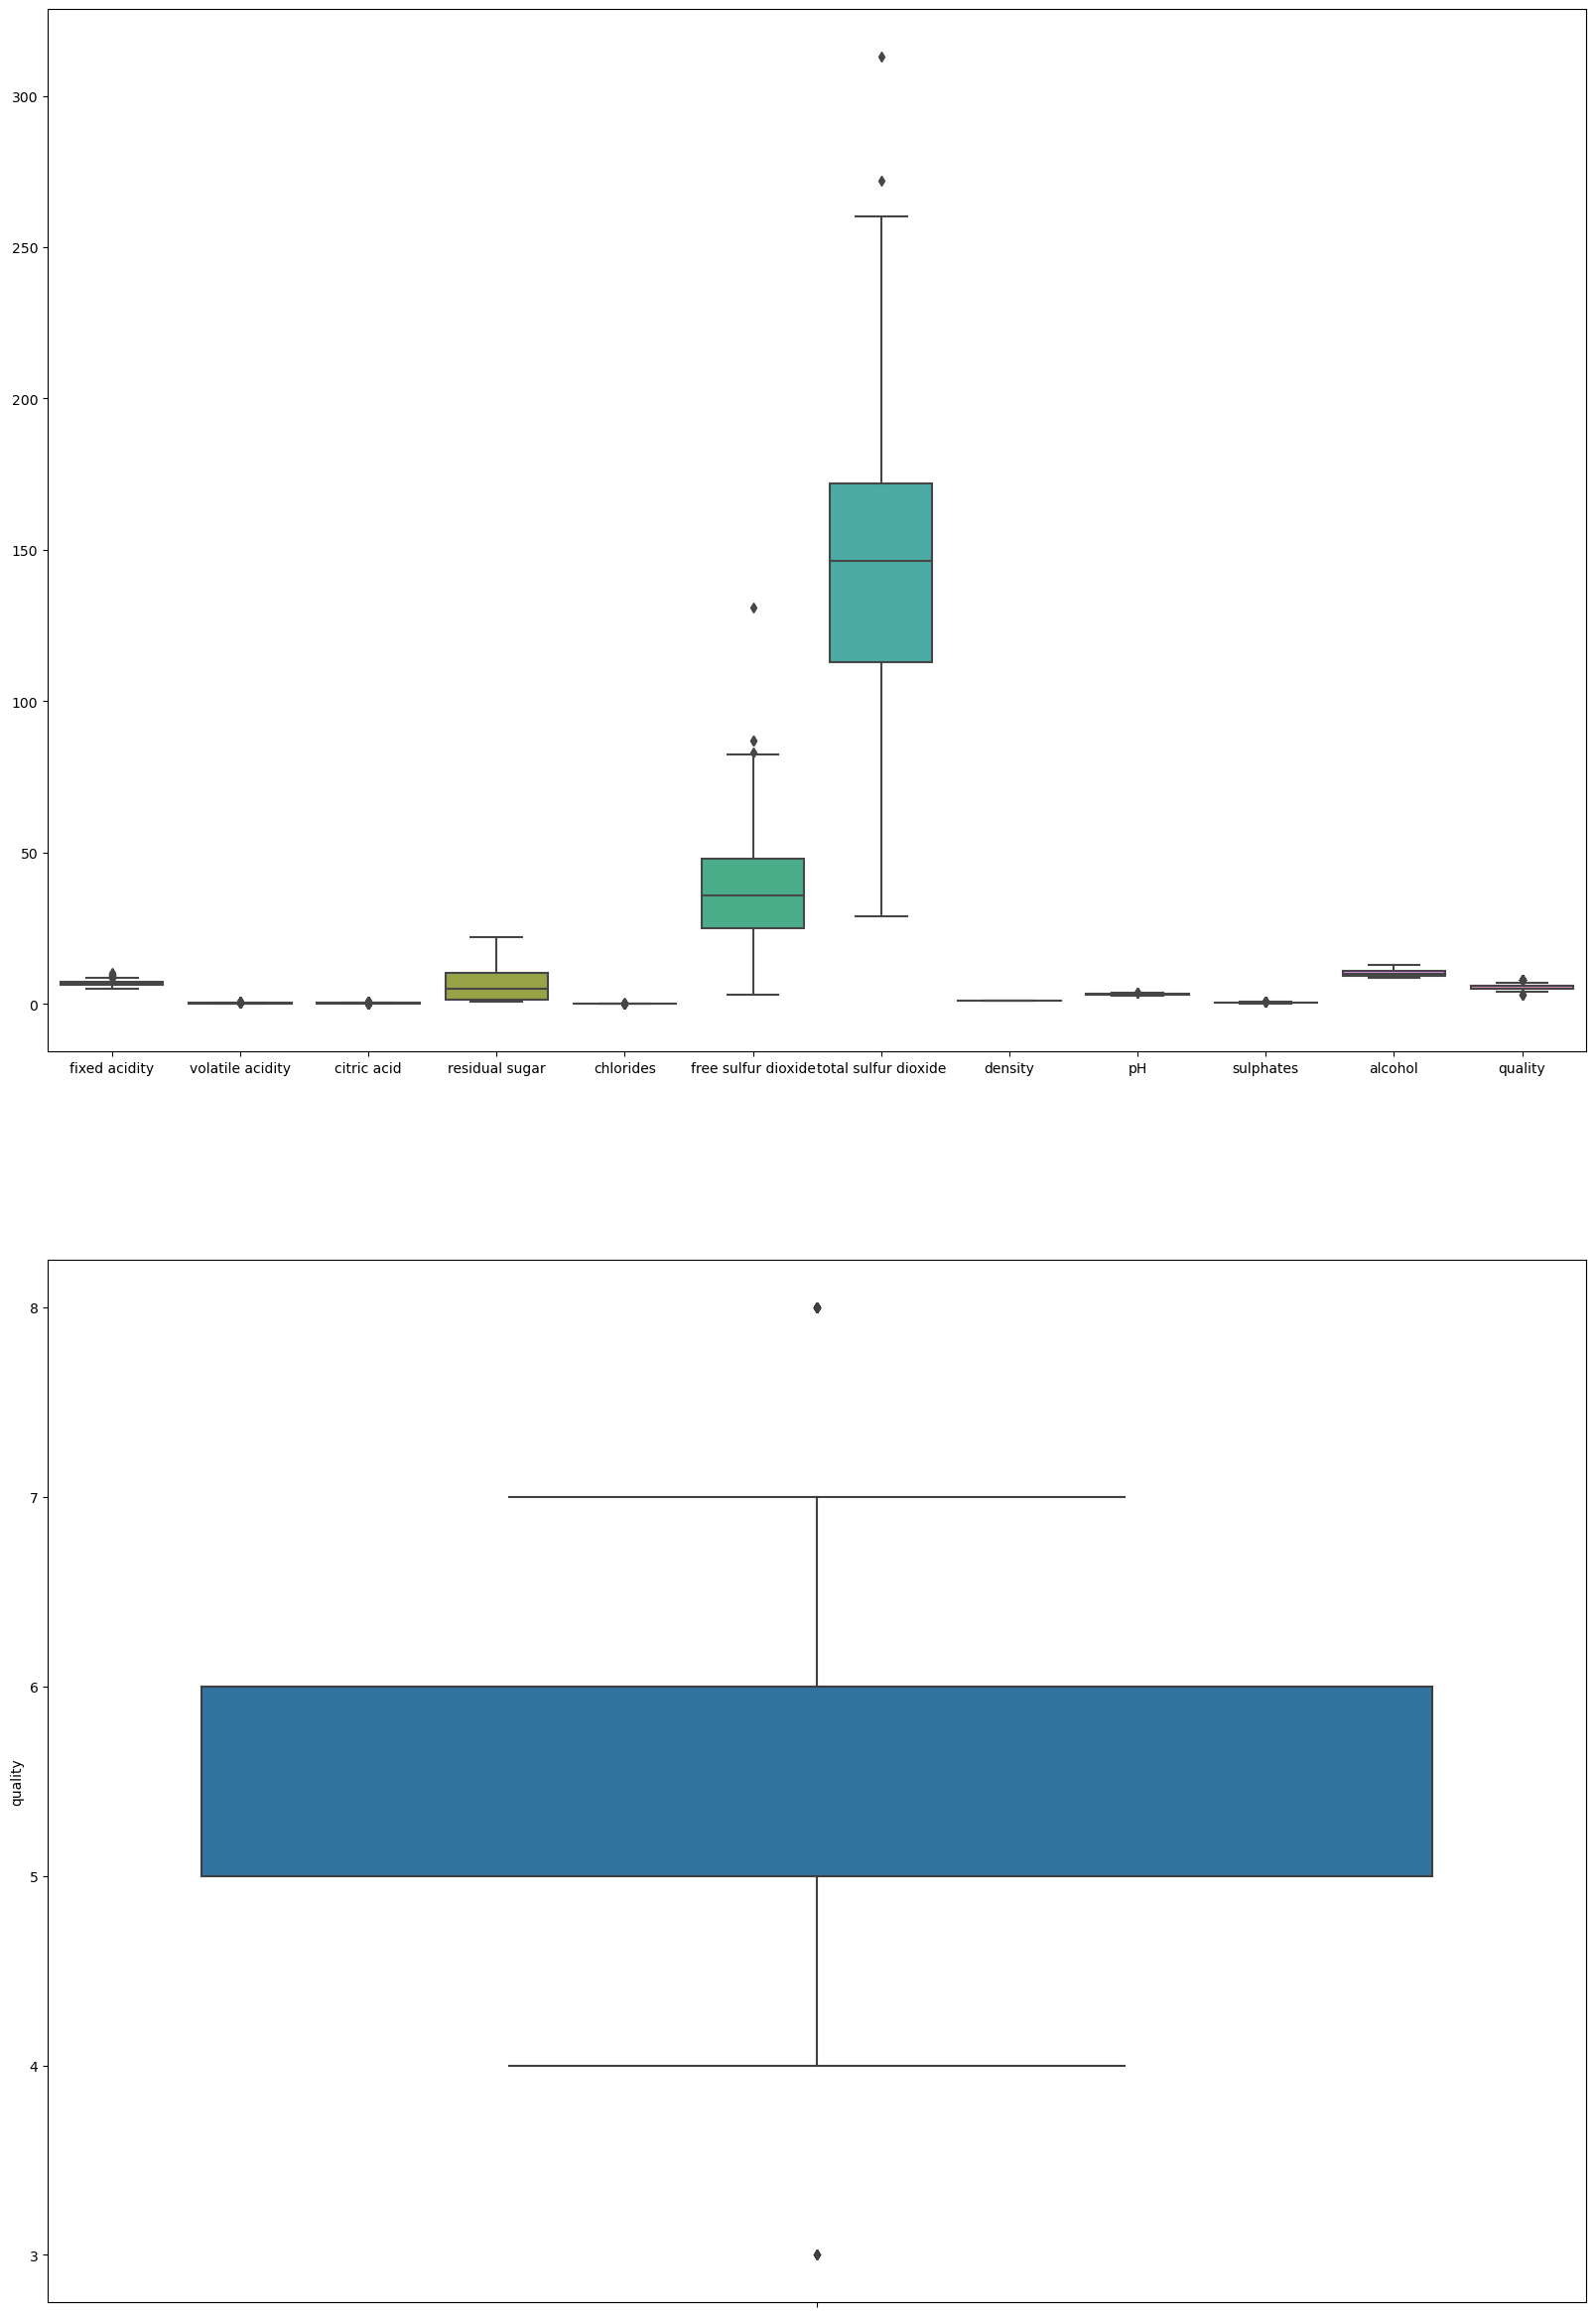

In [39]:
fig, axes = plt.subplots(nrows = 2, ncols =1)
fig.set_size_inches(20,30)
sns.boxplot(data=wine_df,orient="v",ax=axes[0]) # To see if we need to scale our data
sns.boxplot(data=wine_df, y = "quality", orient = "pH", ax=axes[1]) # to see the distribution of quality

<AxesSubplot: >

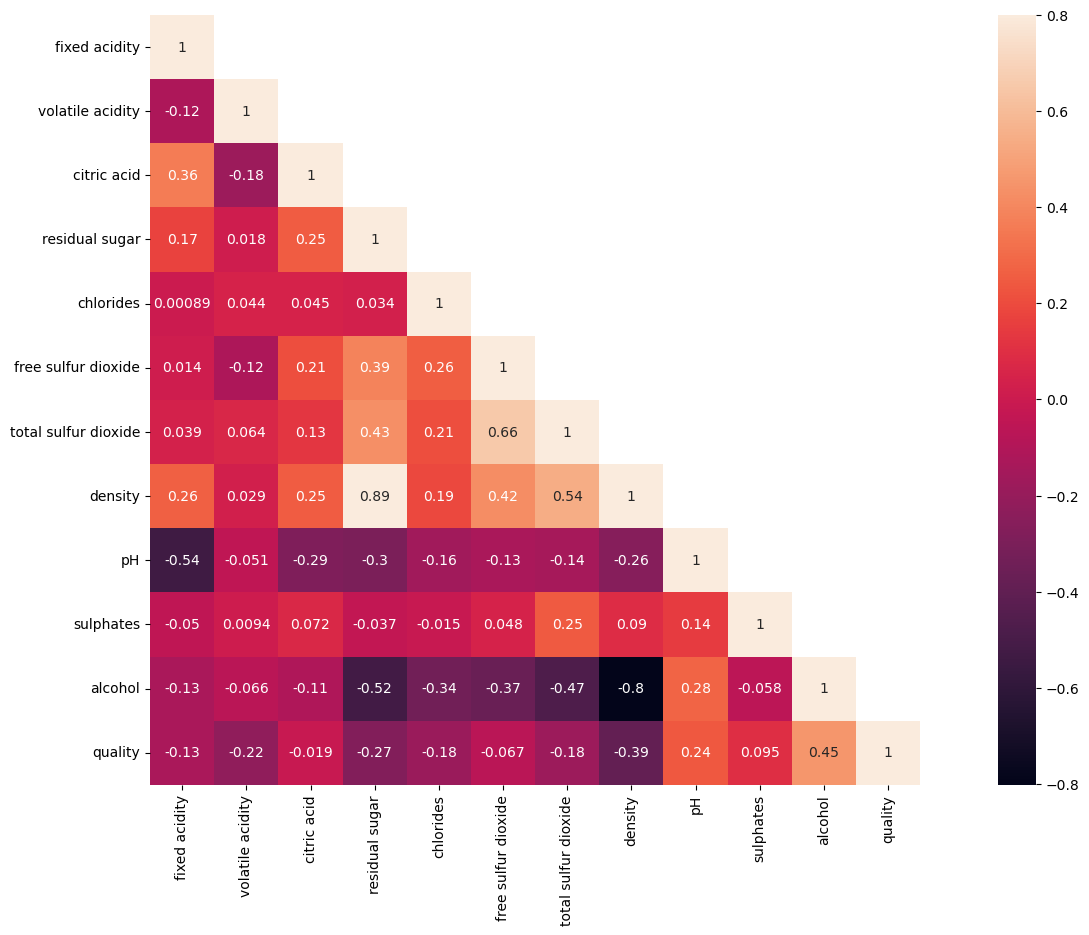

In [25]:
corr_mat = wine_df.corr()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr_mat, mask = mask, vmax = 0.8, square = True, annot = True)

In [40]:
X = wine_df.iloc[:, :-1]
y = wine_df.iloc[: , -1]

In [41]:
## Adding an extra column for the constant used in calculation of Linear Regression
X = np.append(arr = np.ones((X.shape[0],1)), values = X, axis = 1)

In [42]:
X

array([[ 1.  ,  7.  ,  0.27, ...,  3.  ,  0.45,  8.8 ],
       [ 1.  ,  6.3 ,  0.3 , ...,  3.3 ,  0.49,  9.5 ],
       [ 1.  ,  8.1 ,  0.28, ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 1.  ,  7.4 ,  0.37, ...,  3.48,  0.69, 10.7 ],
       [ 1.  ,  6.5 ,  0.36, ...,  3.25,  0.65, 12.4 ],
       [ 1.  ,  7.4 ,  0.24, ...,  3.09,  0.39, 11.1 ]])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [44]:
X_train.shape

(459, 12)

In [45]:
X_test.shape

(153, 12)

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [48]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [49]:
r2_score(y_test, y_pred)

0.23634730130827197

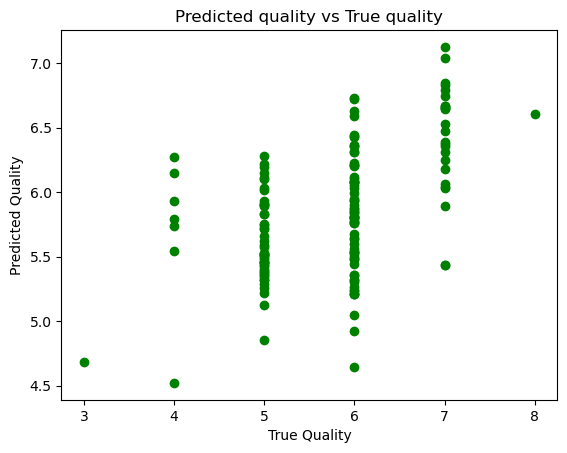

In [50]:
plt.scatter(y_test, y_pred, c ='g')
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted quality vs True quality')
plt.show()